### Generate some statistics files

In [1]:
! pip install libsumo addict

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [7]:
import analysis.stats_utils as stats_utils
from analysis.viz_utils import visualizer
import os
from tqdm import tqdm
# change here
exp_repo = "/home/zhijie/terasim/TeraSim-NDE-ITE/applications/driving_intelligence_test/output"
# exp_repo = "/home/zhijie/terasim/TeraSim-NDE-ITE/output"
exp_name="cosim_test_local"

experiment_record_repo = f"{exp_repo}/{exp_name}/raw_data"
export_stat_dir = f"{exp_repo}/{exp_name}/processed_data"

# # test code
# experiment_record_repo = "output/test/raw_data"
# export_stat_dir = "output/test/processed_data"
# export_stat_dir = "."

if not os.path.exists(export_stat_dir):
    os.system(f"mkdir -p {export_stat_dir}")
    os.system(f"chmod 755 {export_stat_dir}")

In [8]:
stats_utils.export_to_csv(experiment_record_repo, export_stat_dir)
os.system(f"chmod -R 775 {export_stat_dir}")

100%|██████████| 601/601 [00:00<00:00, 864.88it/s]

info_error:  0


0

In [10]:
awk_cmd = """awk -F "[_/]" '{print $35}'""" + " check.txt | sort | uniq -cd"
print("count", "exp_id")
os.system(awk_cmd)

count exp_id


0

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

### Analyze

#### Import statistics of each experiment

In [12]:
exp_stats_info = pd.read_csv(f"{export_stat_dir}/stats.tsv", sep='\t')
exp_stats_info.head()

,name,end_time,warmup_time,run_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,collision_severity
0,cosim_test_local_0_1,1294.5,1144,720,CAV,BV_19.24,-0.008730,2,BV_19.24,-1.0,NaN,NaN,25743.119024,1133.050506,EG_17_1_1_0,rear_end,intersection,4.369559478239125,-1.0,0.0
1,cosim_test_local_0_2,1359.1,1065,720,NaN,NaN,-0.056742,13,NaN,-1.0,NaN,NaN,48394.572790,898.780712,NaN,NaN,NaN,None,-10.0,NaN
2,cosim_test_local_0_3,1519.5,1132,720,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,77169.397664,2836.094602,NaN,NaN,NaN,None,-10.0,NaN
3,cosim_test_local_0_4,1421.0,1108,720,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,59589.184271,2833.284692,NaN,NaN,NaN,None,-10.0,NaN
4,cosim_test_local_0_5,1326.6,1030,720,NaN,NaN,-0.004365,1,NaN,-1.0,NaN,NaN,60455.163220,1702.392321,NaN,NaN,NaN,None,-10.0,NaN


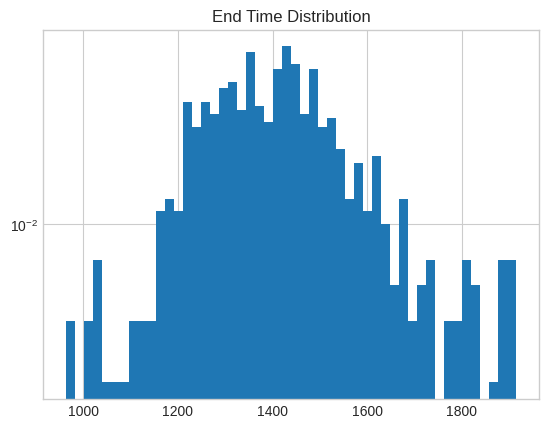

In [13]:
num_experiments = len(exp_stats_info)
plt.hist(exp_stats_info["end_time"], weights=np.ones(num_experiments)/num_experiments, bins=50)
plt.yscale("log")
plt.title("End Time Distribution")
plt.savefig(f"{export_stat_dir}/end_time.png")

In [14]:
warm_up_time = exp_stats_info["warmup_time"]
estimated_end_time = exp_stats_info["warmup_time"] + exp_stats_info["run_time"]
if mode == "NDE":
    has_collision = (exp_stats_info['end_time'] < estimated_end_time) & (exp_stats_info['end_time'] >= warm_up_time)
elif mode == "CAV":
    has_collision = (exp_stats_info['crash_veh_1'] == "CAV") | (exp_stats_info['crash_veh_2'] == "CAV")
collision_df = exp_stats_info[has_collision]

has_collision_in_warmup = (exp_stats_info['end_time'] <= warm_up_time)
warmup_collision_df = exp_stats_info[has_collision_in_warmup]

print("Collision numbers:", len(collision_df), "Warmup collisions:", len(warmup_collision_df)) # the number of collisions 

NameError: name 'has_collision' is not defined

**See the list of files with time difference between negligence and collision larger than 3s**

In [63]:
collision_df.head()

,name,end_time,warmup_time,run_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,...,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,collision_severity,location,collision
0,cosim_test_local_0_1,1294.5,1144,720,CAV,BV_19.24,-0.008730,2,BV_19.24,-1.0,...,25743.119024,1133.050506,EG_17_1_1_0,rear_end,intersection,4.369559478239125,-1.000000,0.000000,intersection,rear
25,cosim_test_local_0_26,1319.7,1123,720,CAV,BV_22.16,4.229031,7,BV_22.16,1.8,...,35186.493079,2918.945850,EG_17_1_1_0,rear_end,intersection,1.0295327964094838,-0.273076,7.540022,intersection,rear
29,cosim_test_local_0_30,979.5,932,720,CAV,BV_21.56,5.259123,6,BV_21.56,2.5,...,9150.375860,429.587980,:NODE_7_0_1,rear_end,roundabout,23.686321204834627,0.092966,4.035679,roundabout,rear
47,cosim_test_local_0_48,1169.3,1144,720,BV_17.52,CAV,5.277120,6,BV_17.52,1.3,...,4121.812059,190.258043,EG_1_3_1_1,rear_end,freeway_1,15.402000976094257,-0.269540,5.078321,freeway,rear
77,cosim_test_local_0_78,1063.0,1043,720,BV_22.10,CAV,5.294579,2,BV_22.10,0.6,...,4269.660340,265.460314,EG_1_3_1_1,sideswipe,freeway_1,17.631378174349607,-0.685488,3.279943,freeway,sideswipe


In [64]:
all_maneuvers = exp_stats_info["maneuver_challenge"].sum()
all_time = (exp_stats_info["end_time"] - exp_stats_info["warmup_time"]).sum()
all_routes = exp_stats_info["route_length"].sum()
mile_to_m = 1609.344
no_negligence_collision_related = collision_df['neg_time_diff'] < 0
power_importance_weight = np.power(10, - exp_stats_info['importance'])
collide_importance_weight = power_importance_weight[(power_importance_weight < 1) & has_collision]
importance_all = collide_importance_weight.sum()
num_experiments = len(exp_stats_info)
num_collisions = len(collision_df)
no_related_negligence_collision = collision_df[no_negligence_collision_related]

print(f"Number of experiments: {num_experiments}")
print(f"Number of collision: {num_collisions}")
print(f"Collisions with weight less than 1: {len(collide_importance_weight)}")
print(f"Importance summation: {importance_all}")
print(f"Max weight: {collide_importance_weight.max()}, Min weight: {collide_importance_weight.min()}")
print(f"raw collision rate: {num_collisions / num_experiments}")
print(f"adjusted collision rate (importance): {importance_all/num_experiments}")
print(f"Collision due to traffic light ignorance: {len(collision_df[collision_df['neg_reason'] == 'TFL'])}")
print(f"Overall maneuvers: {all_maneuvers}")

print(f"Collision without negligence: {len(no_related_negligence_collision)}")
print(f"Maximum time between collision and negligence: {collision_df['neg_time_diff'].max():.2f} s")

print()
print(f"Overall time: {all_time:.2f} s")
print(f"Maneuvers per second: {all_maneuvers / all_time}")
print(f"Overall route length: {all_routes:.2f} m")
print(f"m/s: {all_routes/all_time}")
print(f"Overall route length: {all_routes/mile_to_m} mile")
print(f"mile/s: {all_routes/mile_to_m/all_time} mile/s")
print(f"Crash per mile: {importance_all/all_routes*mile_to_m} crash/mile")

Number of experiments: 601
Number of collision: 37
Collisions with weight less than 1: 34
Importance summation: 0.0005820535811587869
Max weight: 6.658000663686076e-05, Min weight: 5.074823397461178e-06
raw collision rate: 0.06156405990016639
adjusted collision rate (importance): 9.684751766369168e-07
Collision due to traffic light ignorance: 0
Overall maneuvers: 3838
Collision without negligence: 3
Maximum time between collision and negligence: 2.70 s

Overall time: 212836.60 s
Maneuvers per second: 0.018032612811894194
Overall route length: 41402424.65 m
m/s: 194.52680905309128
Overall route length: 25726.273964863427 mile
mile/s: 0.12087335526344353 mile/s
Crash per mile: 2.2624869110612256e-08 crash/mile


In [65]:
a = exp_stats_info[(exp_stats_info["importance"] <= 0) & (exp_stats_info["end_time"] < exp_stats_info["warmup_time"] + exp_stats_info["run_time"])]
a

,name,end_time,warmup_time,run_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,...,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,collision_severity,location,collision
0,cosim_test_local_0_1,1294.5,1144,720,CAV,BV_19.24,-0.008730,2,BV_19.24,-1.0,...,25743.119024,1133.050506,EG_17_1_1_0,rear_end,intersection,4.369559478239125,-1.0,0.0,intersection,rear
1,cosim_test_local_0_2,1359.1,1065,720,NaN,NaN,-0.056742,13,NaN,-1.0,...,48394.572790,898.780712,NaN,NaN,NaN,None,-10.0,NaN,None,None
2,cosim_test_local_0_3,1519.5,1132,720,NaN,NaN,-0.000000,0,NaN,-1.0,...,77169.397664,2836.094602,NaN,NaN,NaN,None,-10.0,NaN,None,None
3,cosim_test_local_0_4,1421.0,1108,720,NaN,NaN,-0.000000,0,NaN,-1.0,...,59589.184271,2833.284692,NaN,NaN,NaN,None,-10.0,NaN,None,None
4,cosim_test_local_0_5,1326.6,1030,720,NaN,NaN,-0.004365,1,NaN,-1.0,...,60455.163220,1702.392321,NaN,NaN,NaN,None,-10.0,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,cosim_test_local_0_596,1445.4,993,720,NaN,NaN,-0.000000,0,NaN,-1.0,...,101966.018120,2775.432946,NaN,NaN,NaN,None,-10.0,NaN,None,None
596,cosim_test_local_0_597,1328.7,984,720,NaN,NaN,-0.000000,0,NaN,-1.0,...,68265.664639,4292.945605,NaN,NaN,NaN,None,-10.0,NaN,None,None
598,cosim_test_local_0_599,1550.4,1181,720,NaN,NaN,-0.004365,1,NaN,-1.0,...,70243.314155,4642.450564,NaN,NaN,NaN,None,-10.0,NaN,None,None
599,cosim_test_local_0_600,1516.3,1042,720,NaN,NaN,-0.130942,30,NaN,-1.0,...,105388.061821,4396.494751,NaN,NaN,NaN,None,-10.0,NaN,None,None


In [66]:
if mode == "NDE":
    is_veh_1_bv_22 = np.array(list(map(lambda x: x.startswith("BV_22"), collision_df["crash_veh_1"])))
    is_veh_2_bv_22 = np.array(list(map(lambda x: x.startswith("BV_22"), collision_df["crash_veh_2"])))
    has_bv_22 = is_veh_1_bv_22 | is_veh_2_bv_22
    bv_22_collision_df = collision_df[has_bv_22]

    total_bv_22_distance = exp_stats_info["bv_22_route_length"].sum()

    num_bv_22_expr = np.sum(has_bv_22)
    bv_22_collision_is_large_1 = bv_22_collision_df["importance"] < 0
    power_bv_22_weight = np.power(10, -bv_22_collision_df["importance"])[~bv_22_collision_is_large_1]
    bv_22_importance = np.sum(power_bv_22_weight)

    print("Number of bv_22 collision:", num_bv_22_expr)
    print("Total bv_22 distance:", total_bv_22_distance)
    print("Number of bv_22 collision importance > 1:", np.sum(bv_22_collision_is_large_1))
    print("Raw collision rate:", num_bv_22_expr / num_experiments)
    print("Collision rate:", bv_22_importance / num_experiments)
    print("Collision rate (weighted):", bv_22_importance / total_bv_22_distance * mile_to_m)

**See the collision number in each experiment**

In [67]:
# collision: negligence-caused 和 no negligence caused (SUMO)
# 每个种类做collision node的分布
neg_caused_collision = exp_stats_info[exp_stats_info["neg_time_diff"] >= 0 & has_collision] # weight < 1 collisions
no_neg_realated_collision = exp_stats_info[(exp_stats_info["neg_time_diff"] < 0) & has_collision]
print("negligence collision number:", len(neg_caused_collision), "non-negligence collision number:", len(no_neg_realated_collision))

negligence collision number: 34 non-negligence collision number: 3


In [68]:
neg_caused_collision["lane_id"].value_counts()

EG_1_3_1_1      23
EG_17_1_1_0      2
EG_9_1_1_0       2
:NODE_17_1_0     2
:NODE_7_0_1      1
:NODE_18_2_0     1
:NODE_26_1_0     1
EG_14_2_1_0      1
EG_16_23_1_0     1
Name: lane_id, dtype: int64

In [69]:
print(no_neg_realated_collision["lane_id"].value_counts())
print(len(no_neg_realated_collision))

EG_17_1_1_0      1
:NODE_22_3_0     1
:NODE_18_15_0    1
Name: lane_id, dtype: int64
3


In [70]:
neg_caused_collision.head()

,name,end_time,warmup_time,run_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,...,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,collision_severity,location,collision
25,cosim_test_local_0_26,1319.7,1123,720,CAV,BV_22.16,4.229031,7,BV_22.16,1.8,...,35186.493079,2918.945850,EG_17_1_1_0,rear_end,intersection,1.0295327964094838,-0.273076,7.540022,intersection,rear
29,cosim_test_local_0_30,979.5,932,720,CAV,BV_21.56,5.259123,6,BV_21.56,2.5,...,9150.375860,429.587980,:NODE_7_0_1,rear_end,roundabout,23.686321204834627,0.092966,4.035679,roundabout,rear
47,cosim_test_local_0_48,1169.3,1144,720,BV_17.52,CAV,5.277120,6,BV_17.52,1.3,...,4121.812059,190.258043,EG_1_3_1_1,rear_end,freeway_1,15.402000976094257,-0.269540,5.078321,freeway,rear
77,cosim_test_local_0_78,1063.0,1043,720,BV_22.10,CAV,5.294579,2,BV_22.10,0.6,...,4269.660340,265.460314,EG_1_3_1_1,sideswipe,freeway_1,17.631378174349607,-0.685488,3.279943,freeway,sideswipe
101,cosim_test_local_0_102,1024.5,1005,720,BV_8.71,CAV,5.168000,31,BV_8.71,0.6,...,4109.850786,0.000000,EG_1_3_1_1,sideswipe,freeway_1,18.312956350202114,-1.631489,6.193043,freeway,sideswipe


In [71]:
neg_caused_collision = neg_caused_collision.copy()
neg_caused_collision["exp_importance"] = np.power(10, -neg_caused_collision["importance"])

# ! should be commmented later
neg_caused_collision["exp_importance"][neg_caused_collision["exp_importance"] >= 1] = 0

get_type_func = lambda x: x.split("_")[0] if x is not np.nan else "None"
neg_caused_collision["location"] = list(map(get_type_func, neg_caused_collision["location_type"]))
neg_caused_collision["collision"] = list(map(get_type_func, neg_caused_collision["collision_type"]))


crash_type_dist = crash_distribution(neg_caused_collision, "collision")
crash_type_dist

/tmp/ipykernel_86557/1315232982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_caused_collision["exp_importance"][neg_caused_collision["exp_importance"] >= 1] = 0


,location,collision,count,exp_importance,collision_rate,importance_rate
0,freeway,rear,12,0.000067,0.019967,1.110965e-07
1,freeway,sideswipe,11,0.000063,0.018303,1.045143e-07
2,intersection,angle,1,0.000010,0.001664,1.630610e-08
3,intersection,rear,7,0.000425,0.011647,7.070317e-07
4,roundabout,rear,3,0.000018,0.004992,2.952657e-08


In [72]:
def pie_chart_plot(df, exp_name, feat_name):
    mark = df["location"] == exp_name
    labels = df[mark][feat_name]
    values = df[mark]["importance_rate"]
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    # plt.bar(labels, values)
    plt.title(f'{exp_name}')
    # plt.legend(labels)

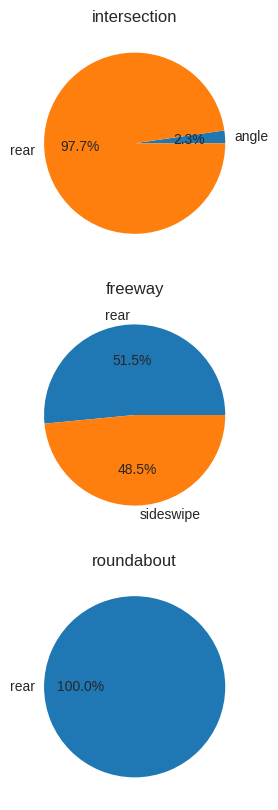

In [73]:
plt.figure(figsize=(30, 10))
plt.subplot(3, 1, 1)
pie_chart_plot(crash_type_dist, "intersection", "collision")
plt.subplot(3, 1, 2)
pie_chart_plot(crash_type_dist, "freeway", "collision")
plt.subplot(3, 1, 3)
pie_chart_plot(crash_type_dist, "roundabout", "collision")
plt.savefig(f"{export_stat_dir}/pie_chart.png")

In [74]:
neg_reason_crash_dist = crash_distribution(neg_caused_collision, "neg_reason")
neg_reason_crash_dist

,location,neg_reason,count,exp_importance,collision_rate,importance_rate
0,freeway,LeftFoll,23,0.000130,0.038270,2.156108e-07
1,intersection,Lead,8,0.000435,0.013311,7.233378e-07
2,roundabout,Lead,3,0.000018,0.004992,2.952657e-08


#### BV 22 Negligence Caused

In [75]:
if mode == "NDE":
    plt.figure(figsize=(30, 10))
    plt.subplot(3, 1, 1)
    pie_chart_plot(bv_22_crash_type_dist, "intersection", "collision")
    plt.subplot(3, 1, 2)
    pie_chart_plot(bv_22_crash_type_dist, "freeway", "collision")
    plt.subplot(3, 1, 3)
    pie_chart_plot(bv_22_crash_type_dist, "roundabout", "collision")
    plt.savefig(f"{export_stat_dir}/bv_22_pie_chart.png")

In [76]:
eg_collision = list(neg_caused_collision["lane_id"])
eg_collision_angle_df = neg_caused_collision[((neg_caused_collision["collision"] == "angle") | (neg_caused_collision["collision"] == "sideswipe")) & (neg_caused_collision["location"] == "freeway")]
# print(neg_caused_collision["relative_heading"])
# print(len(neg_caused_collision["relative_heading"]))

heading_float_list = [float(heading) for heading in eg_collision_angle_df["relative_heading"] if heading != 'None']
heading_float_list = np.array(heading_float_list)
print(len(heading_float_list))

11


0.0


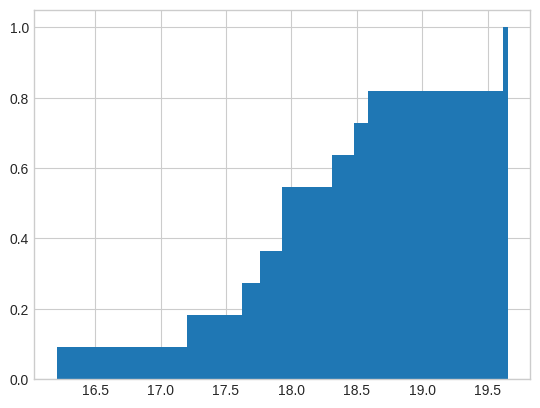

In [77]:
# # draw the histogram of the relative_heading of the collision in each location in neg_caused_collision
# grouped_neg_collision = neg_caused_collision["relative_heading"].groupby(neg_caused_collision["location"])
# for name, group_data in grouped_neg_collision:
#     plt.figure()
#     plt.hist(group_data, bins=50)
#     # plt.title(f"Collision Relative Heading Distribution in {name}")
# heading_flaot_list = np.clip(heading_flaot_list, 0, 30)
plt.figure()
plt.hist(heading_float_list, bins=100, density=True, cumulative=True)

print(np.sum(heading_float_list>20)/len(heading_float_list))

In [78]:
from IPython.display import display
for info, crash_dist in neg_info_crash_dist.items():
    print(info)
    display(crash_dist)

intersection_rearend


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,rear,7,0.000425,0.011647,7.070317e-07


roundabout_rearend


,location,collision,count,exp_importance,collision_rate,importance_rate
0,roundabout,rear,3,0.000018,0.004992,2.952657e-08


highway_cutin


,location,collision,count,exp_importance,collision_rate,importance_rate
0,freeway,rear,12,0.000067,0.019967,1.110965e-07
1,freeway,sideswipe,11,0.000063,0.018303,1.045143e-07


intersection_neglect_conflict_lead


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,angle,1,0.00001,0.001664,1.630610e-08


In [79]:
A[:4, 5:] = 0
A[4:, :5] = 0
A[:7, 8:] = 0
A[7:, :8] = 0

#### Calibration

### Quick check

6.658000663686076e-05 5.074823397461178e-06


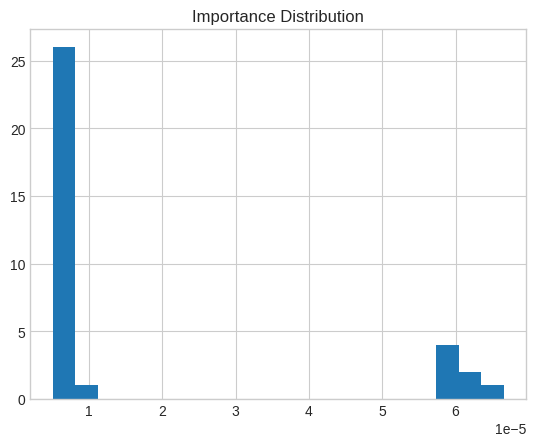

In [80]:
plt.hist(collide_importance_weight, bins=20)
plt.title("Importance Distribution")
plt.savefig(f'{export_stat_dir}/importance.png', dpi=300)
print(collide_importance_weight.max(), collide_importance_weight.min())

In [81]:
# simple checklist
quick_check_list_path = f"{export_stat_dir}/quick_check_list.txt"
neg_caused_check_list_path = f"{export_stat_dir}/neg_caused_check_list.txt"
non_neg_check_list_path = f"{export_stat_dir}/non_neg_check_list.txt"

with open(quick_check_list_path, "w") as f:
    print(*set(quick_check_exp[("name", "first")].values), sep="\n", file=f)
with open(neg_caused_check_list_path, "w") as f:
    print(*set(neg_caused_collision["name"].values), sep="\n", file=f)
with open(non_neg_check_list_path, "w") as f:
    print(*set(no_neg_realated_collision["name"].values), sep="\n", file=f)

In [82]:
exp_stats_info

,name,end_time,warmup_time,run_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,...,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,collision_severity,location,collision
0,cosim_test_local_0_1,1294.5,1144,720,CAV,BV_19.24,-0.008730,2,BV_19.24,-1.0,...,25743.119024,1133.050506,EG_17_1_1_0,rear_end,intersection,4.369559478239125,-1.000000,0.000000,intersection,rear
1,cosim_test_local_0_2,1359.1,1065,720,NaN,NaN,-0.056742,13,NaN,-1.0,...,48394.572790,898.780712,NaN,NaN,NaN,None,-10.000000,NaN,None,None
2,cosim_test_local_0_3,1519.5,1132,720,NaN,NaN,-0.000000,0,NaN,-1.0,...,77169.397664,2836.094602,NaN,NaN,NaN,None,-10.000000,NaN,None,None
3,cosim_test_local_0_4,1421.0,1108,720,NaN,NaN,-0.000000,0,NaN,-1.0,...,59589.184271,2833.284692,NaN,NaN,NaN,None,-10.000000,NaN,None,None
4,cosim_test_local_0_5,1326.6,1030,720,NaN,NaN,-0.004365,1,NaN,-1.0,...,60455.163220,1702.392321,NaN,NaN,NaN,None,-10.000000,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,cosim_test_local_0_597,1328.7,984,720,NaN,NaN,-0.000000,0,NaN,-1.0,...,68265.664639,4292.945605,NaN,NaN,NaN,None,-10.000000,NaN,None,None
597,cosim_test_local_0_598,1210.6,1189,720,BV_14.5,CAV,5.272755,7,BV_14.5,0.6,...,4352.907058,453.074950,EG_1_3_1_1,sideswipe,freeway_1,18.604545849139015,-1.661434,3.892512,freeway,sideswipe
598,cosim_test_local_0_599,1550.4,1181,720,NaN,NaN,-0.004365,1,NaN,-1.0,...,70243.314155,4642.450564,NaN,NaN,NaN,None,-10.000000,NaN,None,None
599,cosim_test_local_0_600,1516.3,1042,720,NaN,NaN,-0.130942,30,NaN,-1.0,...,105388.061821,4396.494751,NaN,NaN,NaN,None,-10.000000,NaN,None,None


In [83]:
exp_stats_info["location"] = list(map(get_type_func, exp_stats_info["location_type"]))
exp_stats_info["collision"] = list(map(get_type_func, exp_stats_info["collision_type"]))

In [86]:
from tqdm import tqdm
def get_location_collision_type(exp_id, exp_stats_info):
    mark = exp_stats_info["name"] == exp_id
    location_type = exp_stats_info[mark]["location"].values[0]
    collision_type = exp_stats_info[mark]["collision"].values[0]
    return location_type, collision_type

def export_videos(export_path, file_name, map_location="./applications/driving_intelligence_test/maps/Mcity_safetest"):
    if not os.path.exists(export_path):
        os.system(f"mkdir -p {export_path}")
        os.system(f"chmod 755 {export_path}")
    with open(file_name) as f:
        for line in tqdm(f.readlines()): 
            exp_id = line.strip()
            path_name = os.path.join(experiment_record_repo, exp_id)
            if os.path.isdir(path_name):
                location_type, collision_type = get_location_collision_type(exp_id, exp_stats_info)
                if location_type == "None" or collision_type == "None":
                    visualizer(map_location, experiment_record_repo, exp_id, os.path.join(export_path, "None"))
                else:
                    visualizer(map_location, experiment_record_repo, exp_id, os.path.join(export_path, f"{location_type}/{collision_type}"))

In [87]:
# simple(typical) non-negligence-caused negligence-caused 
export_path = f"{exp_repo}/{exp_name}/videos"
file_name = f"{export_stat_dir}/check_list.txt"

# quick check
# export_videos(f"{export_path}/quick_check", "check.txt")

print(non_neg_check_list_path)

export_videos(f"{export_path}/non_neg_check", non_neg_check_list_path)
# export_videos(f"{export_path}/neg_caused_check", neg_caused_check_list_path)

/home/zhijie/terasim/TeraSim-NDE-ITE/applications/driving_intelligence_test/output/cosim_test_local/processed_data/non_neg_check_list.txt


  0%|          | 0/3 [00:00<?, ?it/s]

/home/zhijie/terasim/TeraSim-NDE-ITE/applications/driving_intelligence_test/output/cosim_test_local/raw_data/final_state/cosim_test_local_0_final_state.json


FileNotFoundError: [Errno 2] No such file or directory: './applications/driving_intelligence_test/maps/Mcity_safetest/maps/Mcity/mcity.net.xml'

In [ ]:
exp_stats_info[(exp_stats_info["location"] == "roundabout") & (exp_stats_info["lane_id"] == ":NODE_21_0_0") & (exp_stats_info["neg_info"] == "roundabout_neglect_conflict_lead")]["name"].values